In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
%matplotlib inline

In [11]:
police = pd.read_csv("police.csv")
police

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,NaN,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2
91737,RI,2015-12-31,21:59,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
91738,RI,2015-12-31,22:04,NaN,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3
91739,RI,2015-12-31,22:09,NaN,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3


In [12]:
police.stop_date = pd.to_datetime(police.stop_date + ' ' + police.stop_time)

In [18]:
police.rename({'stop_date':'stop_datetime'},inplace=True,axis=1)

In [19]:
police.set_index('stop_datetime',inplace=True)

In [14]:
police.dropna(how='all',axis=1,inplace=True)

In [15]:
police.drop('state',axis=1,inplace=True)

In [20]:
police

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91741 entries, 2005-01-04 12:55:00 to 2015-12-31 22:47:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   stop_time           91741 non-null  object
 1   driver_gender       86536 non-null  object
 2   driver_race         86539 non-null  object
 3   violation_raw       86539 non-null  object
 4   violation           86539 non-null  object
 5   search_conducted    91741 non-null  bool  
 6   search_type         3307 non-null   object
 7   stop_outcome        86539 non-null  object
 8   is_arrested         86539 non-null  object
 9   stop_duration       86539 non-null  object
 10  drugs_related_stop  91741 non-null  bool  
 11  district            91741 non-null  object
dtypes: bool(2), object(10)
memory usage: 7.9+ MB


# What hours have the highest arrest rate?

In [22]:
police.drop('stop_time',axis=1,inplace=True)

In [26]:
police.index.hour

Int64Index([12, 23,  4, 17,  1, 10, 21, 21, 11, 19,
            ...
            13, 18, 19, 20, 20, 21, 21, 22, 22, 22],
           dtype='int64', name='stop_datetime', length=91741)

In [33]:
police.is_arrested = police.is_arrested.astype('bool')

In [35]:
hourly_arrest_rate =police.groupby(police.index.hour).is_arrested.mean()

<AxesSubplot:xlabel='stop_datetime'>

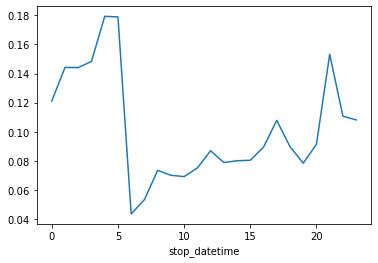

In [36]:
hourly_arrest_rate.plot()

# Are drug-related stops increasing?

<AxesSubplot:xlabel='stop_datetime'>

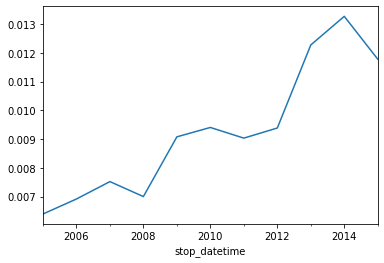

In [42]:
police.drugs_related_stop.resample('A',kind='period').mean().plot()

array([<AxesSubplot:xlabel='stop_datetime'>,
       <AxesSubplot:xlabel='stop_datetime'>], dtype=object)

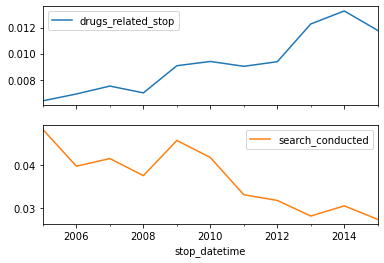

In [48]:
police.resample("A",kind='period')[['drugs_related_stop','search_conducted']].mean().plot(subplots=True)

In [52]:
table = pd.crosstab(police.driver_race,police.driver_gender)

<AxesSubplot:xlabel='driver_race'>

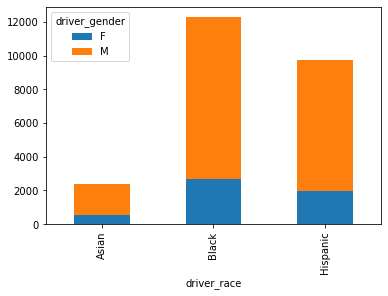

In [56]:
table.loc['Asian': 'Hispanic'].plot(kind='bar',stacked=True)

In [58]:
police.stop_duration

stop_datetime
2005-01-04 12:55:00     0-15 Min
2005-01-23 23:15:00     0-15 Min
2005-02-17 04:15:00     0-15 Min
2005-02-20 17:15:00    16-30 Min
2005-02-24 01:20:00     0-15 Min
                         ...    
2015-12-31 21:21:00     0-15 Min
2015-12-31 21:59:00     0-15 Min
2015-12-31 22:04:00     0-15 Min
2015-12-31 22:09:00     0-15 Min
2015-12-31 22:47:00     0-15 Min
Name: stop_duration, Length: 91741, dtype: object

In [59]:
police.stop_duration.unique()

array(['0-15 Min', '16-30 Min', nan, '30+ Min'], dtype=object)

In [60]:
mapping = {'0-15 Min': 8,'16-30 Min': 23,'30+ Min': 45}

In [62]:
police['stop_minutes'] = police.stop_duration.map(mapping)

In [63]:
police.stop_minutes.unique()

array([ 8., 23., nan, 45.])

<AxesSubplot:ylabel='violation_raw'>

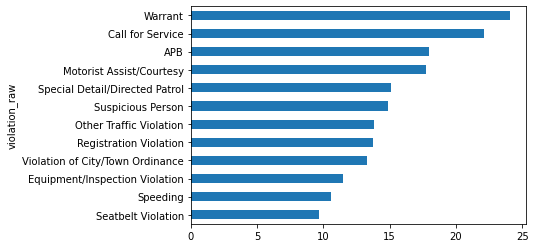

In [69]:
police.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh')